# ライブラリの読み込み

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd

# 売買回数の分布

## 土地

In [1]:
land_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data.csv")

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_3708\3266777637.py:2: DtypeWarning: Columns (0,9,18,42) have mixed types. Specify dtype option on import or set low_memory=False.
  land_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data.csv")


In [2]:
# 売買日を datetime に変換
land_data["register_date"] = pd.to_datetime(land_data["register_date"])

In [3]:
land_data.head()

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,chiban,...,structure,id,line_name,station_name,on_foot,parcel_num,address_group,group_key,sale_count,days_between_sales
0,1938,2023-02-22,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,1047-1,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1047-1,1,NaN
1,1195,2022-02-01,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,1220,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1220,1,NaN
2,3260,2022-03-16,連続,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,2085,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2085,1,NaN
3,8554,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,2185,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2185,1,NaN
4,8608,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町中山,NaN,...,NaN,NaN,NaN,NaN,NaN,148-14,三重県_いなべ市_いなべ市北勢町中山,三重県_いなべ市_いなべ市北勢町中山_148-14,1,NaN


In [31]:
# 売買回数ごとの物件数を集計
sale_count_distribution_land = land_data.groupby("group_key")["sale_count"].first().value_counts().sort_index()

### 売買回数1回以上の分布

In [ ]:
#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_land.index, sale_count_distribution_land.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_land.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


### 売買回数2回以上の分布

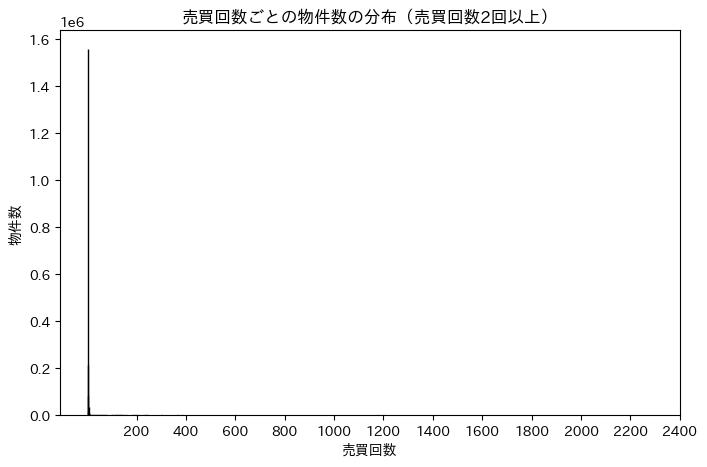

In [9]:
# 売買回数2回以上の物件数の分布

# 売買回数2回以上の物件数を集計
sale_count_distribution_land[1] = 0    # 売買回数1回の物件数を0にする       

#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_land.index, sale_count_distribution_land.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布（売買回数2回以上）")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_land.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


In [14]:
sale_count_distribution_land[:20]

sale_count
1     1686271
2     1559992
3       83793
4      215130
5       14697
6       34989
7        4548
8       10051
9        2092
10       4824
11       1332
12       3124
13        902
14       2087
15        725
16       1530
17        529
18       1106
19        479
20        818
Name: count, dtype: int64

In [32]:
# 総売買件数
len(land_data)

6821321

In [33]:
# 総物件数
sum(sale_count_distribution_land)

3635396

In [34]:
# 総物件数
len(land_data["group_key"].unique())

3635396

## 建物

In [15]:
build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data.csv")
# 売買日を datetime に変換
build_data["register_date"] = pd.to_datetime(build_data["register_date"])

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_3708\1917495502.py:1: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data.csv")


In [ ]:
build_data.head()

In [29]:
# 売買回数ごとの物件数を集計
sale_count_distribution_build = build_data.groupby("group_key")["sale_count"].first().value_counts().sort_index()

In [35]:
# 1回の売買の物件数
print(sale_count_distribution_build[1])

# 総物件数
print(sum(sale_count_distribution_build))

# 総売買件数
print(len(build_data))

192479
205264
237005


### 売買回数1回以上の分布

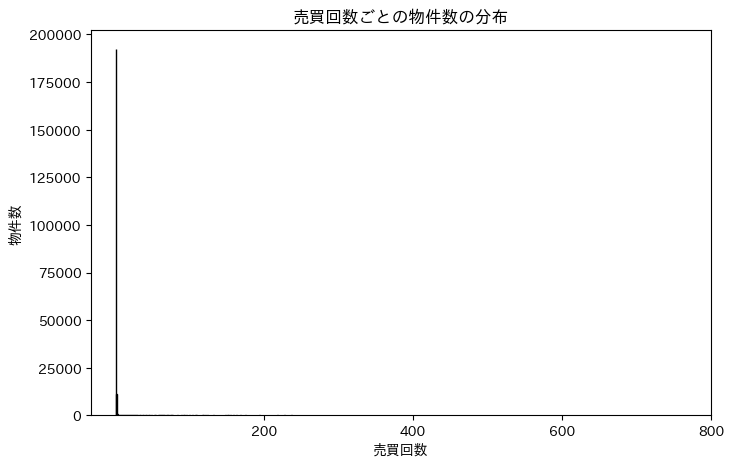

In [24]:
#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_build.index, sale_count_distribution_build.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_build.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


In [25]:
sale_count_distribution_build[:20]

sale_count
1     192479
2      11251
3        698
4        180
5         65
6         57
7         40
8         35
9         41
10        18
11        29
12        28
13        19
14        14
15        10
16        11
17         9
18        11
19        10
20         9
Name: count, dtype: int64

### 売買回数2回以上の分布

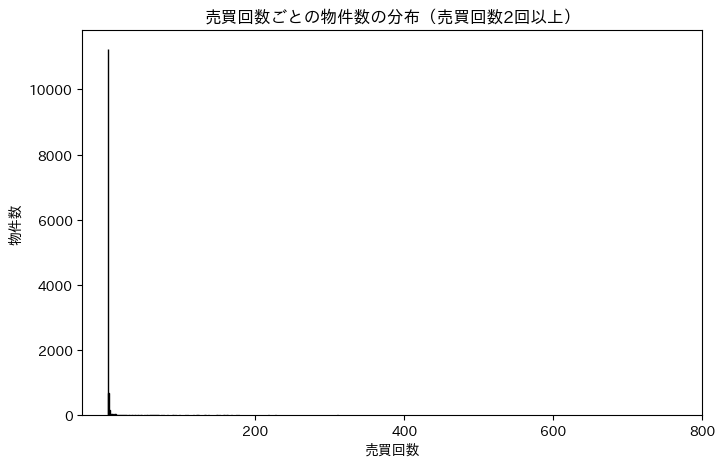

In [26]:
# 売買回数2回以上の物件数の分布

# 売買回数2回以上の物件数を集計
sale_count_distribution_build[1] = 0    # 売買回数1回の物件数を0にする       

#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_build.index, sale_count_distribution_build.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布（売買回数2回以上）")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_build.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


## 区分建物

In [36]:
unit_build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data.csv")
# 売買日を datetime に変換
unit_build_data["register_date"] = pd.to_datetime(unit_build_data["register_date"])

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_3708\1414535474.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  unit_build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data.csv")


In [ ]:
unit_build_data.head()

In [42]:
# 売買回数ごとの物件数を集計
sale_count_distribution_unit_build = unit_build_data.groupby("group_key")["sale_count"].first().value_counts().sort_index()

In [39]:
# 1回の売買の物件数
print(sale_count_distribution_unit_build[1])

# 総物件数
print(sum(sale_count_distribution_unit_build))

# 総売買件数
print(len(unit_build_data))

490058
918504
2789327


### 売買回数1回以上の分布

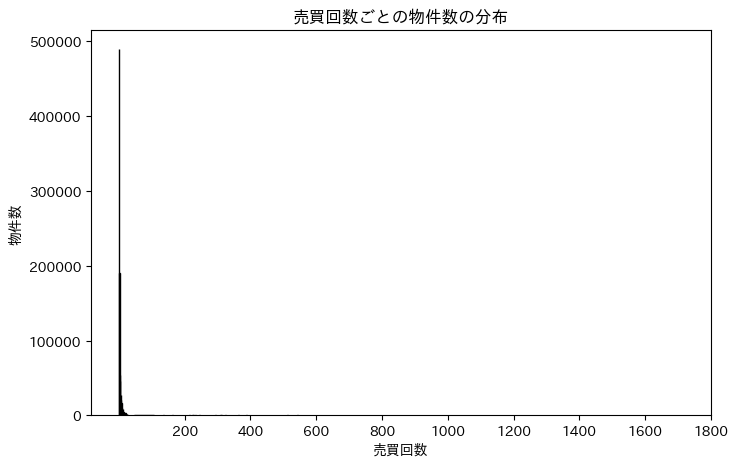

In [40]:
#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_unit_build.index, sale_count_distribution_unit_build.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_unit_build.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


In [43]:
sale_count_distribution_unit_build[:20]

sale_count
1     490058
2     189959
3      54099
4      46571
5      20112
6      27229
7       9697
8      16288
9       6815
10     10006
11      2840
12      8192
13      2123
14      4652
15      2988
16      3870
17      1596
18      3493
19      2096
20      2961
Name: count, dtype: int64

### 売買回数2回以上の分布

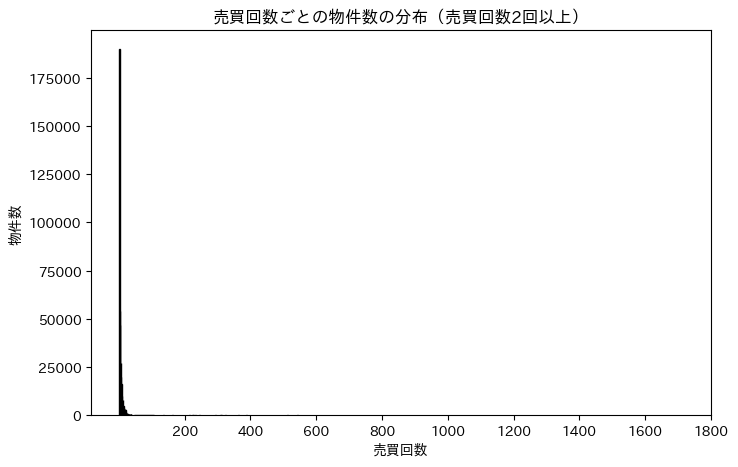

In [41]:
# 売買回数2回以上の物件数の分布

# 売買回数2回以上の物件数を集計
sale_count_distribution_unit_build[1] = 0    # 売買回数1回の物件数を0にする       

#  ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.bar(sale_count_distribution_unit_build.index, sale_count_distribution_unit_build.values, color='blue', edgecolor='black')

# 軸ラベル
plt.xlabel("売買回数")
plt.ylabel("物件数")
plt.title("売買回数ごとの物件数の分布（売買回数2回以上）")

# X軸の目盛りを「200おき」と「maxより大きい最小の200の倍数」まで表示
max_value = sale_count_distribution_unit_build.index.max()
max_tick = ((max_value // 200) + 1) * 200  # max_value より大きい最小の 200 の倍数
xticks = list(range(200, max_tick + 1, 200))  # 200, 400, 600, ..., max_tick

plt.xticks(xticks)

plt.show()


# 売買間隔日数の分布

## 土地

### 売買間隔日数0日以上の分布

In [57]:
land_data

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,chiban,...,structure,id,line_name,station_name,on_foot,parcel_num,address_group,group_key,sale_count,days_between_sales
0,1938,2023-02-22,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,1047-1,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1047-1,1,NaN
1,1195,2022-02-01,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,1220,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1220,1,NaN
2,3260,2022-03-16,連続,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,2085,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2085,1,NaN
3,8554,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,NaN,2185,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2185,1,NaN
4,8608,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町中山,NaN,...,NaN,NaN,NaN,NaN,NaN,148-14,三重県_いなべ市_いなべ市北勢町中山,三重県_いなべ市_いなべ市北勢町中山_148-14,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821316,9702,2023-07-28,単独,所有権移転売買,鹿児島県,鹿屋市,既,土地,鹿屋市高須町,NaN,...,NaN,NaN,NaN,NaN,NaN,932-8,鹿児島県_鹿屋市_鹿屋市高須町,鹿児島県_鹿屋市_鹿屋市高須町_932-8,1,NaN
6821317,2693,2017-03-08,連続,所有権移転売買,鹿児島県,鹿屋市,既,土地,鹿屋市高須町,939-1,...,NaN,NaN,NaN,宮ケ浜,230.0,939-1,鹿児島県_鹿屋市_鹿屋市高須町,鹿児島県_鹿屋市_鹿屋市高須町_939-1,2,0.0
6821318,2693,2017-03-08,連続,所有権移転売買,鹿児島県,鹿屋市,既,土地,鹿屋市高須町,939-1,...,NaN,NaN,NaN,宮ケ浜,230.0,939-1,鹿児島県_鹿屋市_鹿屋市高須町,鹿児島県_鹿屋市_鹿屋市高須町_939-1,2,NaN
6821319,6318,2018-06-15,連続,所有権移転売買,鹿児島県,鹿屋市,既,土地,鹿屋市高須町,942,...,NaN,NaN,NaN,宮ケ浜,230.0,942,鹿児島県_鹿屋市_鹿屋市高須町,鹿児島県_鹿屋市_鹿屋市高須町_942,2,0.0


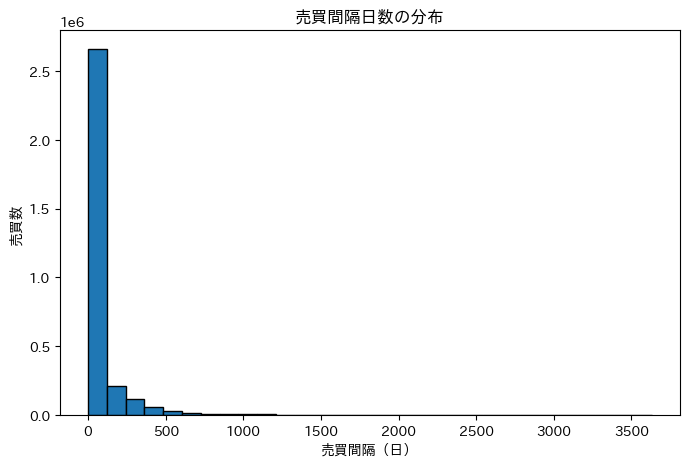

In [58]:
# 売買間隔（日数）のデータを取得（NaN を除く）
days_between_sales = land_data["days_between_sales"].dropna()

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_between_sales, bins=30, edgecolor='black')

# 軸ラベル
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布")

# グラフを表示
plt.show()

### 売買間隔日数1日以上の分布

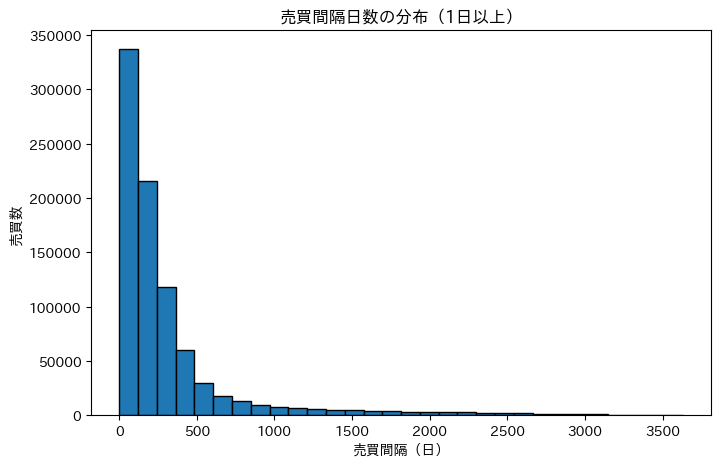

In [59]:
# 売買間隔（日数）のデータを取得し、NaNを除外
days_between_sales = land_data["days_between_sales"].dropna()

# 1日以上のデータに限定
days_filtered = days_between_sales[days_between_sales >= 1]

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_filtered, bins=30, edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布（1日以上）")

# グラフを表示
plt.show()


## 建物

### 売買間隔日数0日以上の分布

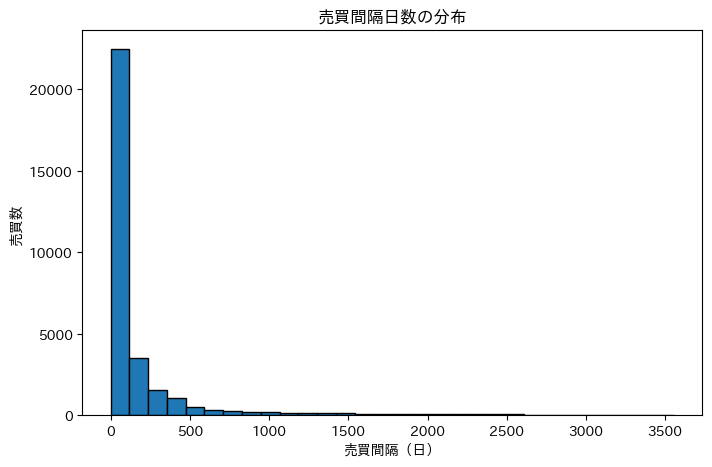

In [60]:
# 売買間隔（日数）のデータを取得（NaN を除く）
days_between_sales = build_data["days_between_sales"].dropna()

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_between_sales, bins=30, edgecolor='black')

# 軸ラベル
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布")

# グラフを表示
plt.show()

### 売買間隔日数1日以上の分布

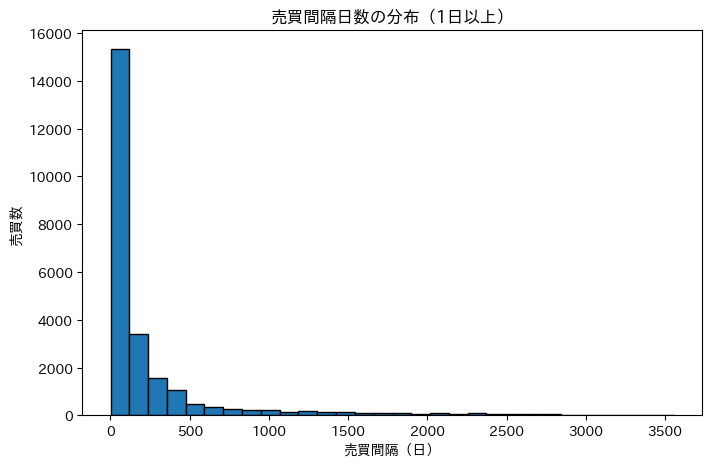

In [61]:
# 売買間隔（日数）のデータを取得し、NaNを除外
days_between_sales = build_data["days_between_sales"].dropna()

# 1日以上のデータに限定
days_filtered = days_between_sales[days_between_sales >= 1]

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_filtered, bins=30, edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布（1日以上）")

# グラフを表示
plt.show()


## 区分建物

### 売買間隔日数0日以上の分布

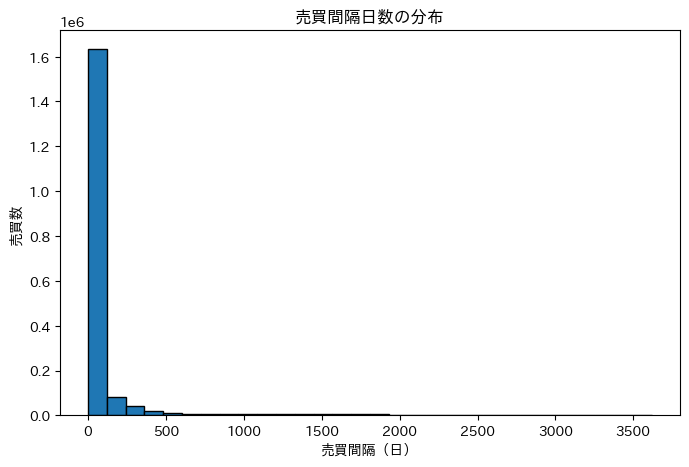

In [62]:
# 売買間隔（日数）のデータを取得（NaN を除く）
days_between_sales = unit_build_data["days_between_sales"].dropna()

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_between_sales, bins=30, edgecolor='black')

# 軸ラベル
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布")

# グラフを表示
plt.show()

### 売買間隔日数1日以上の分布

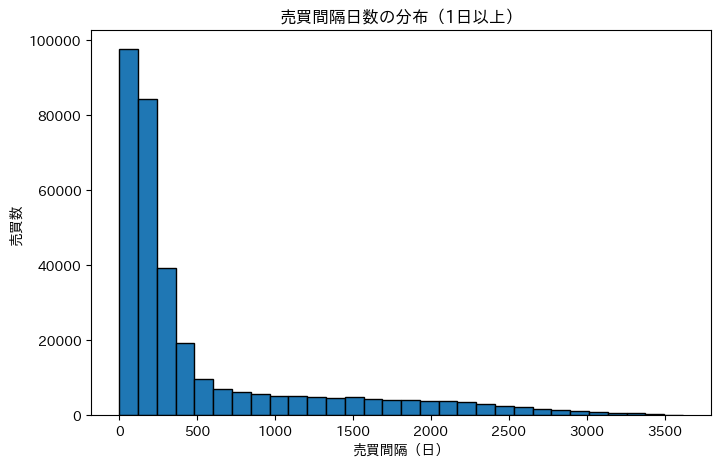

In [63]:
# 売買間隔（日数）のデータを取得し、NaNを除外
days_between_sales = unit_build_data["days_between_sales"].dropna()

# 1日以上のデータに限定
days_filtered = days_between_sales[days_between_sales >= 1]

# ヒストグラムを描画
plt.figure(figsize=(8, 5))
plt.hist(days_filtered, bins=30, edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xlabel("売買間隔（日）")
plt.ylabel("売買数")
plt.title("売買間隔日数の分布（1日以上）")

# グラフを表示
plt.show()
